In [1]:
!pip install skimage

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic, felzenszwalb, quickshift
from skimage.color import label2rgb
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage import data, color
from tensorflow.keras.datasets import fashion_mnist, cifar100
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
image = test_images[5]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 192, 188, 181,
        189, 157, 165, 188, 176, 179, 181,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 235, 213, 213,
        223, 225, 217, 214, 204, 211, 189,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 234, 217, 211,
        217, 200, 203, 217, 203, 179, 170,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 105, 252, 205, 209,
        219, 193, 195, 212, 207, 194, 204,  51,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 204, 228, 184, 206,
        215, 221, 212, 209, 199, 190, 227, 105,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 244, 192, 193, 212,
        217, 210, 216, 216, 194, 175, 225, 131,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25, 247, 170, 192, 210,
        211, 239, 231, 219, 199, 179, 217, 124,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  49, 236, 170, 193, 201,
        220, 187, 231, 230, 206, 181, 213, 116,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  87, 232, 159, 193, 200,
        245,   0, 207, 245, 200, 176, 210, 109,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 221, 170, 189, 216,
        225,   0, 151, 254, 198, 183, 209, 103,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 206, 176, 185, 242,
        146,   0,  53, 255, 201, 183, 205, 100,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 177, 197, 175, 189, 247,
         34,   0,   0, 253, 203, 180, 199,  97,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 172, 186, 174, 199, 223,
          0,   0,   0, 234, 204, 162, 199, 106,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 154, 177, 174, 211, 151,
          0,   0,   0, 210, 202, 141, 180, 108,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 141, 171, 175, 246,  70,
          0,   2,   0, 177, 204, 121, 145, 136,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 135, 179, 191, 248,  28,
          0,   5,   0, 134, 210, 107, 142, 119,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  90, 189, 198, 211,   4,
          0,   3,   0,  59, 244, 118, 165, 123,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 187, 195, 225,  70,
          0,   4,   0,  20, 215, 116, 167, 137,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 182, 199, 221, 163,
          0,   0,   0,   0, 238, 147, 179, 129,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 194, 208, 213, 217,
          0,   0,   0,   0, 246, 197, 203, 138,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 135, 225, 206, 201,
          0,   0,   0,   0, 215, 215, 221, 140,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 219, 204, 217,
         34,   0,   0,   0, 202, 215, 224, 123,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203, 214, 223,
         88,   0,   0,   0, 196, 219, 230, 130,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 133, 217, 217,
        167,   0,   0,   0, 184, 221, 232, 132,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

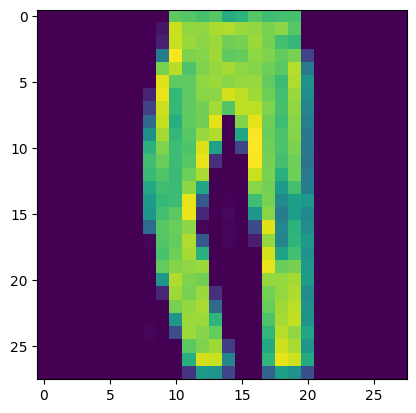

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

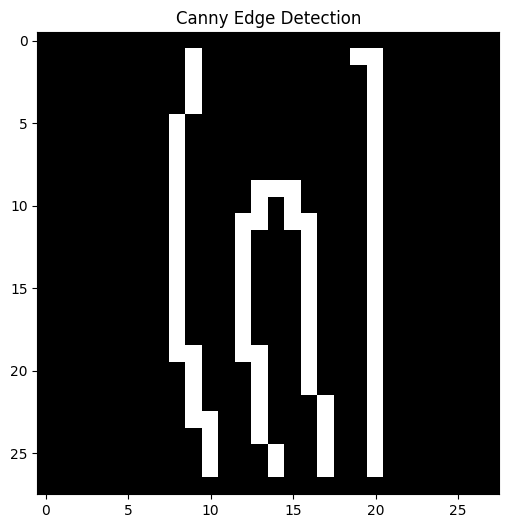

In [8]:
edges = canny(image, sigma=1.5)
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()

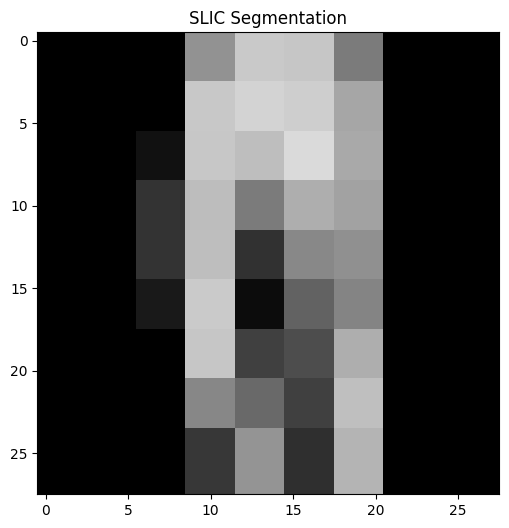

In [10]:
slic_segments = slic(image, n_segments=100, compactness=10,channel_axis=None)
plt.figure(figsize=(6, 6))
plt.imshow(label2rgb(slic_segments, image, kind='avg'))
plt.title("SLIC Segmentation")
plt.show()

<ipython-input-11-38a3217661f9>:5: RuntimeWarning: divide by zero encountered in scalar divide
  y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
<ipython-input-11-38a3217661f9>:6: RuntimeWarning: divide by zero encountered in scalar divide
  y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)


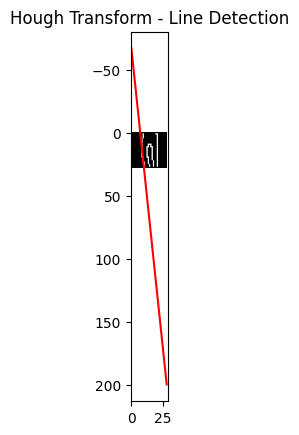

In [11]:
hspace, angles, dists = hough_line(edges)
fig, ax = plt.subplots()
ax.imshow(edges, cmap='gray')
for _, angle, dist in zip(*hough_line_peaks(hspace, angles, dists)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, image.shape[1]), (y0, y1), '-r')
ax.set_title('Hough Transform - Line Detection')
plt.show()

Detected centers: [0.25     0.234375]
Detected radii: [22  6]
Error drawing circle at 0.25 with radius 22: invalid index to scalar variable.
Error drawing circle at 0.234375 with radius 6: invalid index to scalar variable.


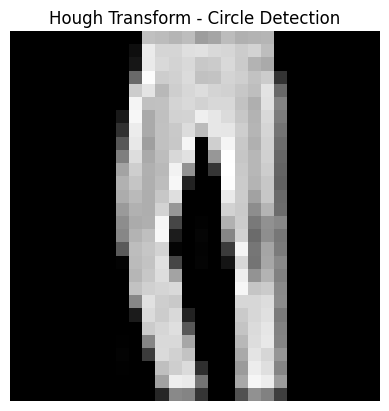

In [17]:
image = test_images[5]

# Convert to RGB
image_color = color.gray2rgb(image)

# Apply Canny edge detection
edges_circle = canny(image, sigma=1.5)

# Define radii range for the Hough Transform
hough_radii = np.arange(10, 50, 2)

# Perform Hough Circle Transform
hough_res = hough_circle(edges_circle, hough_radii)

# Extract circle parameters
results = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=2)

# Ensure we have enough values
if len(results) == 4:
    centers_yx, radii, accums, _ = results
else:
    print("No circles detected!")
    centers_yx, radii = [], []

# Debug: Print detected circle info
print(f"Detected centers: {centers_yx}")
print(f"Detected radii: {radii}")

# Draw detected circles
for center, radius in zip(centers_yx, radii):
    try:
        circy, circx = circle_perimeter(center[0], center[1], radius)
        valid_idx = (circy >= 0) & (circy < image.shape[0]) & (circx >= 0) & (circx < image.shape[1])
        image_color[circy[valid_idx], circx[valid_idx]] = (220, 20, 20)  # Red color for circles
    except Exception as e:
        print(f"Error drawing circle at {center} with radius {radius}: {e}")


plt.imshow(image_color)
plt.title("Hough Transform - Circle Detection")
plt.axis('off')
plt.show()

In [18]:
(_, _), (cifar_test_images, _) = cifar100.load_data()
cifar_image = cifar_test_images[5]
cifar_image_pil = Image.fromarray(cifar_image)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [20]:
# YOLO Object Detection (Placeholder: Requires Pretrained YOLO Model)
# Assuming we load a YOLO model and pass the image (not implemented here due to lack of pretrained model in Torchvision)

# Faster-RCNN for Object Detection
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(cifar_image_pil).unsqueeze(0)

In [21]:
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(cifar_image_pil).unsqueeze(0)

# Load Pretrained Faster R-CNN Model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 131MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

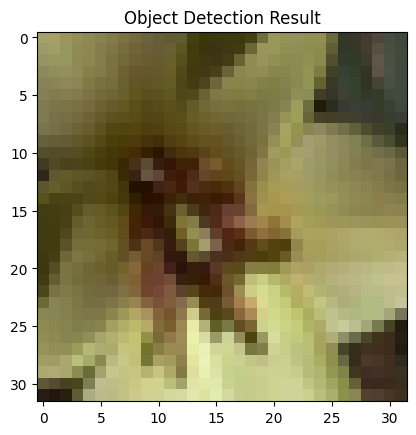

Detected objects:


In [22]:
with torch.no_grad():
    predictions = model(image_tensor)

# Display Results
plt.imshow(cifar_image)
plt.title("Object Detection Result")
plt.show()

# Prin
print("Detected objects:")
for idx, score in enumerate(predictions[0]['scores']):
    if score > 0.5:  # Confidence threshold
        print(f"Class: {predictions[0]['labels'][idx]}, Score: {score.item()}")